#### Problem Statement:

Classifying mushroom species using  pre-trained VGG19 network.

In [1]:
# Installing package to split one dataset to Train $ Validation
#! pip install split-folders

#### Import Libraries:

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Flatten
from tensorflow.data import Dataset
import matplotlib.pyplot as plt
import cv2
from keras.preprocessing import image
import numpy as np
import split_folders
from PIL import ImageFile

In [17]:

import tensorflow as tf
print(tf.__version__)

2.5.0


In [18]:
# The Datset splits into Train and Validation
#split_folders.ratio('Mushrooms', output="output", seed=1337, ratio=(.8,.2)) 

#### Preprocessing Images:

In [30]:
# Ensuring that the train data will be scaled down, zoomed,sheared and horizontally flipped

train_datagen=ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [31]:
# Importing the train data and setting its size to 64x64
train_data=train_datagen.flow_from_directory("output/train",target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 5367 images belonging to 9 classes.


In [32]:
# Ensuring that the val data will be scaled down, 
val_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
# Importing the train data and setting its size to 64x64
val_data=val_datagen.flow_from_directory("output/val",target_size=(64, 64),batch_size=32,class_mode='categorical')

Found 1347 images belonging to 9 classes.


#### Building a model using the pre-trained VGG-19 model:

In [34]:
#Initialising the VGG19 model
model=VGG19()

In [35]:
# Checking the entire structure of VGG19
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [36]:
# Excluding the Convolution layers of the VGG19 model and setting the input shape same as that of target size during Data Augmentation
model=VGG19(input_shape=(64,64,3),include_top=False)

In [37]:
# Train the weights of only the dense layers 
for layers in model.layers:
    if('dense' not in layers.name):
        layers.trainable=False
    if('dense' in layers.name):
        layers.trainable=True

In [38]:
#Adding the new dense layers to the VGG19 model
transfer_model=Sequential([model,
                          Flatten(),
                          Dense(32,activation='relu'),
                          Dense(9,activation='softmax')])
transfer_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 2, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                65568     
_________________________________________________________________
dense_5 (Dense)              (None, 9)                 297       
Total params: 20,090,249
Trainable params: 65,865
Non-trainable params: 20,024,384
_________________________________________________________________


#### Comipiling the model:

In [39]:
#Compiling the model using adam optimizer, loss as 'categorical_crossentropy' and metrics as accuracy
transfer_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#### Training the Model:

In [40]:

ImageFile.LOAD_TRUNCATED_IMAGES = True
my_model=transfer_model.fit_generator(train_data,steps_per_epoch=5367 //32,epochs=25,validation_data=val_data,validation_steps=1347 //32)

Epoch 1/25
167/167 [==============================] - 119s 708ms/step - loss: 1.9280 - accuracy: 0.2948 - val_loss: 1.8026 - val_accuracy: 0.3452
Epoch 2/25
167/167 [==============================] - 109s 653ms/step - loss: 1.7462 - accuracy: 0.3741 - val_loss: 1.7334 - val_accuracy: 0.3616
Epoch 3/25
167/167 [==============================] - 110s 661ms/step - loss: 1.6661 - accuracy: 0.4015 - val_loss: 1.6691 - val_accuracy: 0.4092
Epoch 4/25
167/167 [==============================] - 111s 662ms/step - loss: 1.6158 - accuracy: 0.4157 - val_loss: 1.6556 - val_accuracy: 0.4226
Epoch 5/25
167/167 [==============================] - 111s 664ms/step - loss: 1.5746 - accuracy: 0.4319 - val_loss: 1.6133 - val_accuracy: 0.4234
Epoch 6/25
167/167 [==============================] - 111s 665ms/step - loss: 1.5371 - accuracy: 0.4412 - val_loss: 1.6147 - val_accuracy: 0.4129
Epoch 7/25
167/167 [==============================] - 111s 663ms/step - loss: 1.5221 - accuracy: 0.4572 - val_loss: 1.5881 -

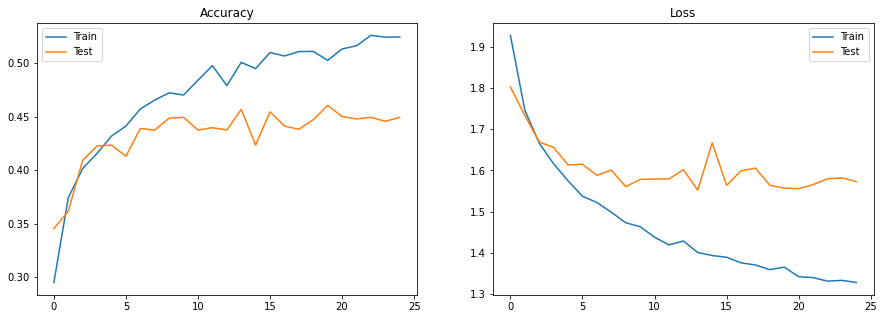

In [42]:
# Comparing performance metrics of the model
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(my_model.history['accuracy'],label='Train')
plt.plot(my_model.history['val_accuracy'],label='Test')
plt.title("Accuracy")
plt.legend()

plt.subplot(122)
plt.plot(my_model.history['loss'],label='Train')
plt.plot(my_model.history['val_loss'],label='Test')
plt.title("Loss")
plt.legend()
plt.show()

#### Making Single Predictions of Mushroom Species from Test Data:

#### 1. Mushroom Type: Agaricus

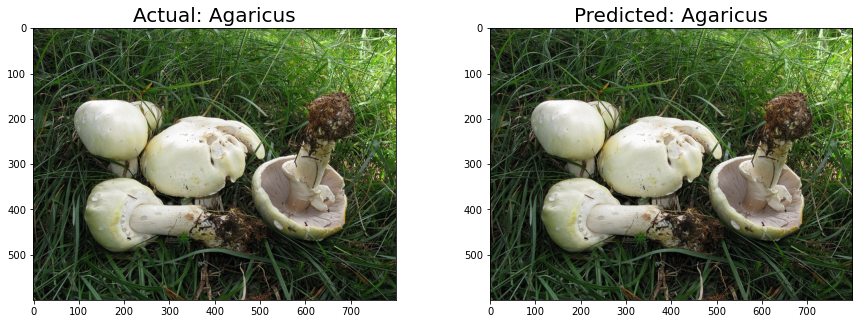

In [120]:
img1=cv2.imread("Mushrooms/Agaricus/003_4AurAO4Jil8.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Agaricus/003_4AurAO4Jil8.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img1)
plt.title("Actual: Agaricus",fontsize=20)

plt.subplot(122)
plt.imshow(img1)
plt.title("Predicted: {}".format(prediction),fontsize=20)
plt.show()

#### 2. Mushroom Type: Amanita

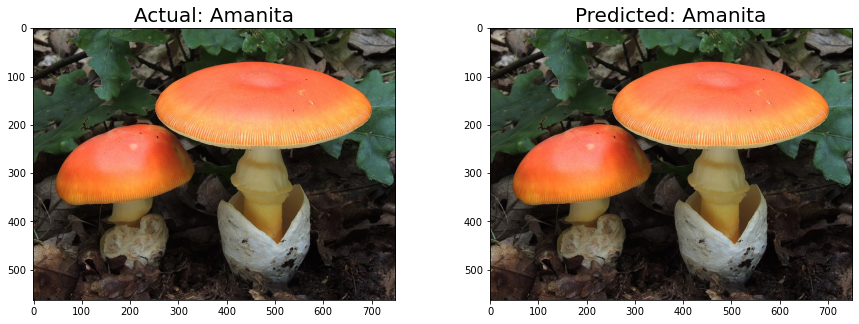

In [119]:
img2=cv2.imread("Mushrooms/Amanita/013_6tvG-1vnN90.jpg")
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Amanita/013_6tvG-1vnN90.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img2)
plt.title("Actual: Amanita",fontsize=20)

plt.subplot(122)
plt.imshow(img2)
plt.title("Predicted: {}".format(prediction),fontsize=20)

plt.show()

#### 3. Mushroom Type: Boletus

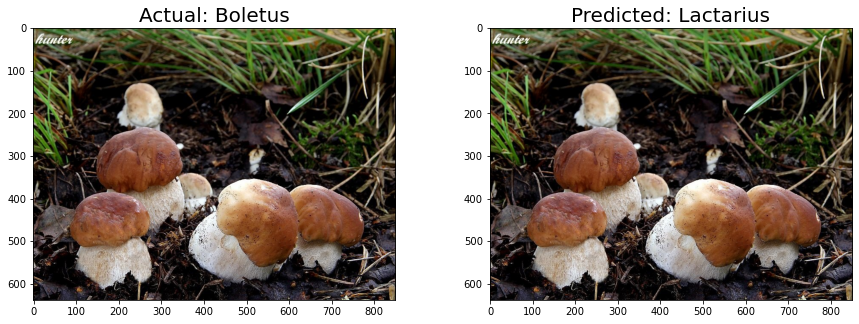

In [122]:
img3=cv2.imread("Mushrooms/Boletus/0094_fGO6un6TzT8.jpg")
img3=cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Boletus/0094_fGO6un6TzT8.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img3)
plt.title("Actual: Boletus",fontsize=20)

plt.subplot(122)
plt.imshow(img3)
plt.title("Predicted: {}".format(prediction),fontsize=20)

plt.show()

#### 4. Mushroom Type: Cortinarius

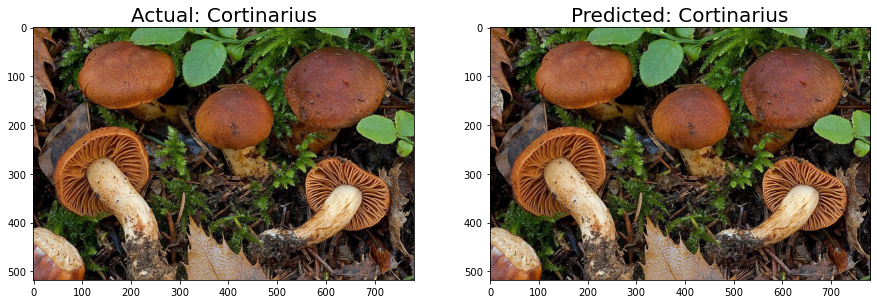

In [123]:
img4=cv2.imread("Mushrooms/Cortinarius/179_l_PfPwLXwow.jpg")
img4=cv2.cvtColor(img4,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Cortinarius/179_l_PfPwLXwow.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img4)
plt.title("Actual: Cortinarius",fontsize=20)

plt.subplot(122)
plt.imshow(img4)
plt.title("Predicted: {}".format(prediction),fontsize=20)

plt.show()

#### 5. Mushroom Type: Entoloma

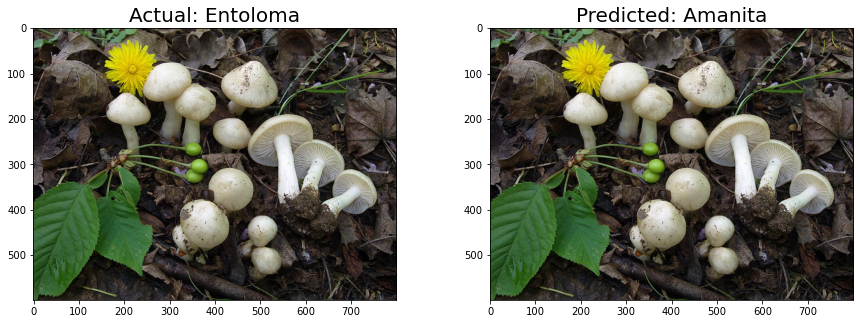

In [127]:
img5=cv2.imread("Mushrooms/Entoloma/351_j79v2a_FfmU.jpg")
img5=cv2.cvtColor(img5,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Entoloma/351_j79v2a_FfmU.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img5)
plt.title("Actual: Entoloma",fontsize=20)

plt.subplot(122)
plt.imshow(img5)
plt.title("Predicted: {}".format(prediction),fontsize=20)

plt.show()

#### 6. Mushroom Type: Hygrocybe

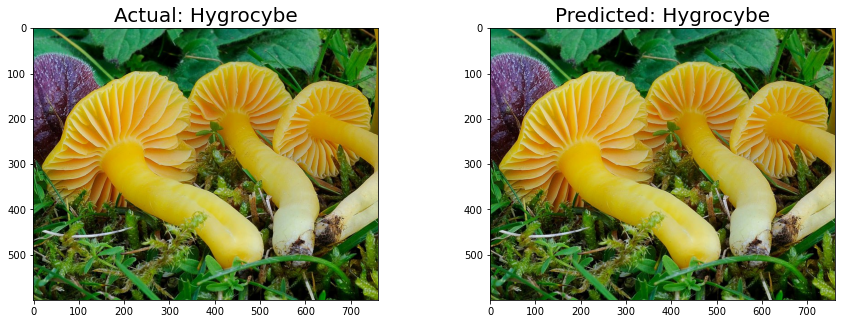

In [129]:
img6=cv2.imread("Mushrooms/Hygrocybe/092_pLnT-Cgm2OA.jpg")
img6=cv2.cvtColor(img6,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Hygrocybe/092_pLnT-Cgm2OA.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img6)
plt.title("Actual: Hygrocybe",fontsize=20)

plt.subplot(122)
plt.imshow(img6)
plt.title("Predicted: {}".format(prediction),fontsize=20)

plt.show()

#### 7. Mushroom Type: Lactarius

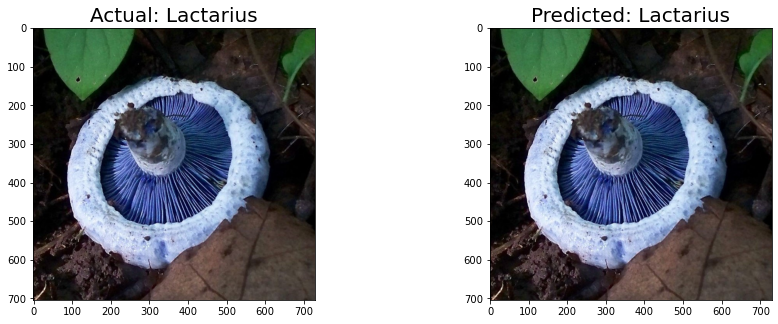

In [131]:
img7=cv2.imread("Mushrooms/Lactarius/122_W_5GcNcAuN4.jpg")
img7=cv2.cvtColor(img7,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Lactarius/122_W_5GcNcAuN4.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img7)
plt.title("Actual: Lactarius",fontsize=20)

plt.subplot(122)
plt.imshow(img7)
plt.title("Predicted: {}".format(prediction),fontsize=20)

plt.show()

#### 8. Mushroom Type: Russula

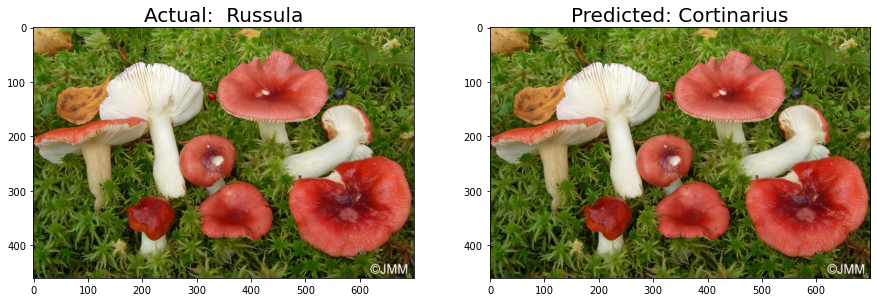

In [137]:
img8=cv2.imread("Mushrooms/Russula/066_QwlTSWbST_A.jpg")
img8=cv2.cvtColor(img8,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Russula/066_QwlTSWbST_A.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img8)
plt.title("Actual:  Russula",fontsize=20)

plt.subplot(122)
plt.imshow(img8)
plt.title("Predicted: {}".format(prediction),fontsize=20)

plt.show()

#### 9. Mushroom Type: Suillus

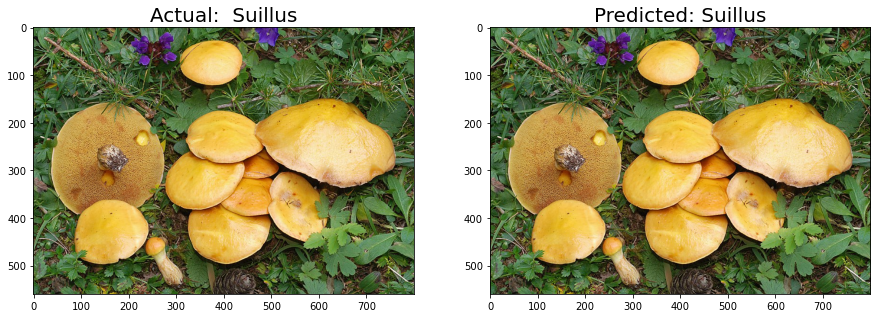

In [143]:
img9=cv2.imread("Mushrooms/Suillus/099_SjqYFPsudTk.jpg")
img9=cv2.cvtColor(img9,cv2.COLOR_BGR2RGB)
test_image = image.load_img('Mushrooms/Suillus/099_SjqYFPsudTk.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = transfer_model.predict(test_image/255.)
prediction=list(train_data.class_indices.keys())[np.argmax(result)]

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.imshow(img9)
plt.title("Actual:  Suillus",fontsize=20)

plt.subplot(122)
plt.imshow(img9)
plt.title("Predicted: {}".format(prediction),fontsize=20)

plt.show()

#### Conclusion:

- Among 9 species of mushrooms 6 were correctly classified when single images were passed on for predicting the classes.
- The model gave an accuracy of 52.4% on Train data and 44.5% on Test data.
- The loss obtained is 1.3 on Train data and 1.5 on Test data